In [2]:
!ls -l
!pwd

total 14688
-rwxr-xr-x@  1 chung  staff   374195 Oct 15 21:37 DR_MultiClasses_Reduced2.ipynb
-rw-r--r--@  1 chung  staff     4031 Sep 23 14:04 DecisionBoundry_Multiclasses.py
-rw-r--r--@  1 chung  staff   210065 Sep 28 21:57 INT_NEW.pptx
-rw-r--r--@  1 chung  staff  6474551 Sep 27 17:39 INT_Report_MuraFinal.pptx
drwxr-xr-x@ 12 chung  staff      408 Oct 15 21:18 NEW
-rw-r--r--   1 chung  staff   390582 Oct 15 21:28 Untitled.ipynb
-rw-r--r--@  1 chung  staff     2085 Sep 29 16:47 _INT_Mura_ vstack_ hstack.py
-rw-r--r--@  1 chung  staff     2329 Sep 20 21:49 _INT_Mura_Decision_Region_Car.py
-rw-r--r--@  1 chung  staff     6527 Sep 27 14:50 _INT_Mura_Decision_Region_Multiclasses.py
-rwxr-xr-x@  1 chung  staff     7263 Sep 26 22:28 _INT_Mura_Decision_Region_Multiclasses_W10.py
-rwxr-xr-x@  1 chung  staff     5331 Sep 26 17:45 _INT_Mura_Decision_Region_Multiclasses_W101_SVM.py
-rw-r--r--@  1 chung  staff     6219 Sep 26 22:20 _INT_Mura_Decision_Region_One.py
-rwxr-xr-x@  1 chung  staff     6

In [3]:
#from IPython.display import display
#import tensorflow as tf
import numpy as np
import pandas as pd
import scipy
from scipy.stats import scoreatpercentile
from pandas.tools.plotting import scatter_matrix
from pandas import DataFrame

import os
import matplotlib.pyplot as plt
#import matplotlib as plt
#import seaborn as sns

import matplotlib.gridspec as gridspec
import itertools
from mlxtend.plotting import plot_decision_regions

import mglearn
import tflearn
from tflearn.data_utils import load_image

print ("NumPy version", np.__version__)
print ("SciPy version", scipy.__version__)
print ("Pandas version", pd.__version__)

NumPy version 1.12.1
SciPy version 0.19.0
Pandas version 0.20.1


In [4]:
SCRIPT_PATH = '/Users/chung/int/02_PPT_Mura/NEW'
#
imgs = []
num = 5
for i in range(1, num + 1):
    img = load_image("%s/train/%s.jpg" % (SCRIPT_PATH, i))
#    img = img.resize((224,224))
    img = img.resize((270,506))
    img_arr = np.asarray(img)
    imgs.append(img_arr)
#
imgs = np.array(imgs)

In [5]:
print ("Shape of imgs", imgs.shape)


Shape of imgs (5, 506, 270, 4)


In [6]:
imgs = imgs / 255
#imgs = imgs.reshape(1,224, 224,4)
imgs = imgs.transpose(0,3,1,2)

In [7]:
print ("Shape of img_arr", img_arr.shape)

print ("Shape of imgs", imgs.shape)

Shape of img_arr (506, 270, 4)
Shape of imgs (5, 4, 506, 270)


Shape of Image0 (50, 20)
Images Data Points = 1000


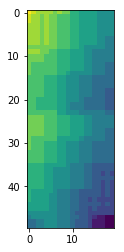

In [8]:
Image0 = imgs[0,0]      # Set the input images

#Image0 = Image0[400:450,220:240]
#Image0 = Image0[400:450,240:260]
Image0 = Image0[400:450,250:270]
#Image0 = Image0[400:450,30:50]

print ("Shape of Image0", Image0.shape)

Size0 = Image0.shape[0] * Image0.shape[1]
print('Images Data Points = {}'.format(Size0))

plt.imshow(Image0)
plt.show()

In [9]:
##################################################################### 506 X 270
#
X0 = np.zeros((Size0,2))
X0 = np.zeros((Image0.size,2))
Y0 = np.zeros(Image0.size)
#Y0 = Image0.reshape(Size0, 1)

print ("Shape of X0 : ", X0.shape)
print ("Shape of Y0 : ", Y0.shape)

avg=np.mean(Image0)
Max0 = Image0.max()
Min0 = Image0.min()
Std0 = Image0.std()
med=np.median(Image0)
np.percentile(Image0, 50)
percentile25=np.percentile(Image0, 25)
percentile75=np.percentile(Image0, 75)

print ("Mean :                   ", avg)
print ("Max :                    ", Max0)
print ("Min :                    ", Min0)
print ("Std :                    ", Std0)
print ("Score at percentile 25 : ", scoreatpercentile(Image0, 25))
print ("Score at percentile 50 : ", scoreatpercentile(Image0, 50))
print ("Score at percentile 75 : ", scoreatpercentile(Image0, 75))

Shape of X0 :  (1000, 2)
Shape of Y0 :  (1000,)
Mean :                    0.640866666667
Max :                     0.666666666667
Min :                     0.611764705882
Std :                     0.00954139406439
Score at percentile 25 :  0.635294117647
Score at percentile 50 :  0.639215686275
Score at percentile 75 :  0.647058823529


In [10]:
#
'''
for i in range(Image0.shape[0]):
    for j in range(Image0.shape[1]):
        X0[j+i*270]=[i,j]
        if Image0[i,j] > percentile75: 
           Y0[j+i*270]=2
        else:
           if Image0[i,j] < percentile25:
              Y0[j+i*270]=1
           else:
              Y0[j+i*270]=0
'''

for i in range(Image0.shape[0]):
    for j in range(Image0.shape[1]):
        X0[j+i*20]=[i,j]
        if (Image0[i,j] > percentile75) & (Image0[i,j] <= Max0):
           Y0[j+i*20]=3
        else:
           if (Image0[i,j] > percentile25) & (Image0[i,j] <= percentile75):
              Y0[j+i*20]=2
           else:
              if (Image0[i,j] > Min0) & (Image0[i,j] < percentile25):
                 Y0[j+i*20]=1
              else:
                 Y0[j+i*20]=0


Y0=Y0.astype(np.integer)

In [11]:
print ("Shape of X0 : ", X0.shape)
print ("Shape of Y0 : ", Y0.shape)

#print ("X0 = ", X0)
#print ("Y0 = ", Y0)

Shape of X0 :  (1000, 2)
Shape of Y0 :  (1000,)


In [12]:
df_Y0 = pd.DataFrame(Y0)

df_Y0[0].values

Counts0 = df_Y0[0].value_counts()
print(Counts0)
#

print('Class labels:', np.unique(df_Y0))

2    403
3    227
1    215
0    155
Name: 0, dtype: int64
Class labels: [0 1 2 3]


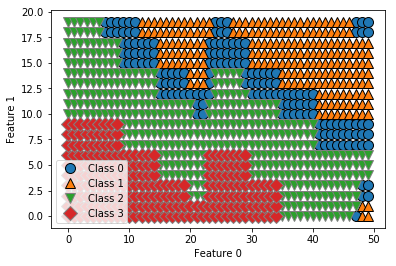

In [13]:
mglearn.discrete_scatter(X0[:, 0], X0[:, 1], Y0)
#plt.scatter(X0[:,0], X0[:,1], s=40, c=Y0, cmap=plt.cm.Spectral)
#plt.scatter(X0[:,0], X0[:,1], s=10, c=Y0)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2","Class 3"])
plt.show()

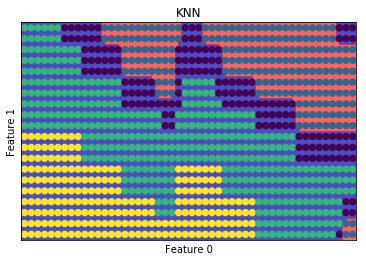

In [14]:
#
############################# Modeling 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
############################# Modeling 
#
######################
# KNN                #
######################

knn = KNeighborsClassifier(n_neighbors= 3).fit(X0, Y0)

#mglearn.plots.plot_2d_classification(knn, X0, fill=True, alpha=.7)
#mglearn.plots.plot_2d_classification(knn, X0, fill=True, eps=0.91,alpha=.17)
mglearn.plots.plot_2d_separator(knn, X0, fill=True, eps=0.5,alpha=.7)

plt.scatter(X0[:, 0], X0[:, 1], s=40, c=Y0)
#plt.scatter(X0[:, 0], X0[:, 1], s=40, c=Y0, cmap=plt.cm.Spectral)
#plt.scatter(X0[:, 0], X0[:, 1], s=10, c=Y0)

plt.title("KNN")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

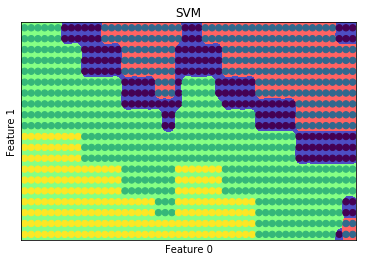

In [15]:
######################
# SVM                #
######################

svm = SVC(kernel='rbf', C=3,  gamma=0.9).fit(X0, Y0)

mglearn.plots.plot_2d_classification(svm, X0, fill=True, eps=0.5,alpha=.7)

plt.scatter(X0[:, 0], X0[:, 1], s=40, c=Y0)

plt.title("SVM")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

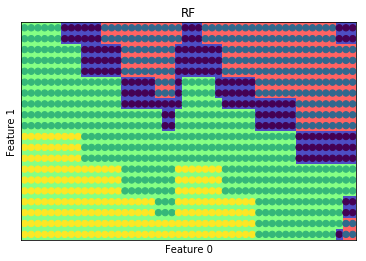

In [16]:
######################
# RF                 #
######################

forest = RandomForestClassifier(n_estimators=100,random_state=0, n_jobs=-1).fit(X0, Y0)

mglearn.plots.plot_2d_classification(forest, X0, fill=True, eps=0.5,alpha=.7)

#mglearn.discrete_scatter( X[:, 0], X[:, 1], y)
plt.scatter(X0[:, 0], X0[:, 1], s=40, c=Y0)
plt.title("RF")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()